In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import xgboost as xgb 
from sklearn.linear_model import Lasso


In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
pd.options.display.max_rows=None

In [6]:
data['date'].unique()

array(['2013-01-01', '2013-01-02', '2013-01-03', ..., '2017-12-29',
       '2017-12-30', '2017-12-31'], dtype=object)

In [7]:
#splitting the date column into seperate date,day, and month columns
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day


In [8]:
data['year'].unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int32)

In [9]:
data['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [10]:
data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int32)

In [11]:
# start=2013-1-1,end= 2017-12-31

In [12]:
data['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [13]:
data['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [14]:
data['sales'].nunique()

213

In [15]:
grouped_data = data.groupby(['store', 'item']).size().reset_index(name='counts')
print(grouped_data)


     store  item  counts
0        1     1    1826
1        1     2    1826
2        1     3    1826
3        1     4    1826
4        1     5    1826
5        1     6    1826
6        1     7    1826
7        1     8    1826
8        1     9    1826
9        1    10    1826
10       1    11    1826
11       1    12    1826
12       1    13    1826
13       1    14    1826
14       1    15    1826
15       1    16    1826
16       1    17    1826
17       1    18    1826
18       1    19    1826
19       1    20    1826
20       1    21    1826
21       1    22    1826
22       1    23    1826
23       1    24    1826
24       1    25    1826
25       1    26    1826
26       1    27    1826
27       1    28    1826
28       1    29    1826
29       1    30    1826
30       1    31    1826
31       1    32    1826
32       1    33    1826
33       1    34    1826
34       1    35    1826
35       1    36    1826
36       1    37    1826
37       1    38    1826
38       1    39    1826


In [16]:
data['sales'].describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64

In [17]:
data[data['sales']==data['sales'].min()]

,date,store,item,sales,year,month,day
64289,2014-01-15,6,4,0,2014,1,15


In [18]:
tem4 = data[data['item']==4]
m =tem4['sales'].max()
me =tem4['sales'].mean()
print(m,me)



66 22.01024096385542


In [19]:
data[data['sales']==data['sales'].max()]

,date,store,item,sales,year,month,day
259109,2017-07-02,2,15,231,2017,7,2


In [20]:
item_stats = data.groupby('item')['sales'].agg(['min', 'max', 'mean']).reset_index()
item_stats


,item,min,max,mean
0,1,1,59,21.981599
1,2,9,150,58.574151
2,3,7,104,36.642223
3,4,0,66,22.010241
4,5,1,50,18.358708
5,6,11,148,58.503888
6,7,11,141,58.531051
7,8,15,181,76.950055
8,9,6,134,51.389869
9,10,14,175,73.227437


In [21]:
im = item_stats['mean'].mean()
item_stats[item_stats['mean']<im]['item'].unique()

array([ 1,  3,  4,  5,  9, 16, 17, 19, 20, 21, 23, 26, 27, 30, 32, 34, 37,
       39, 40, 41, 42, 43, 44, 47, 48, 49])

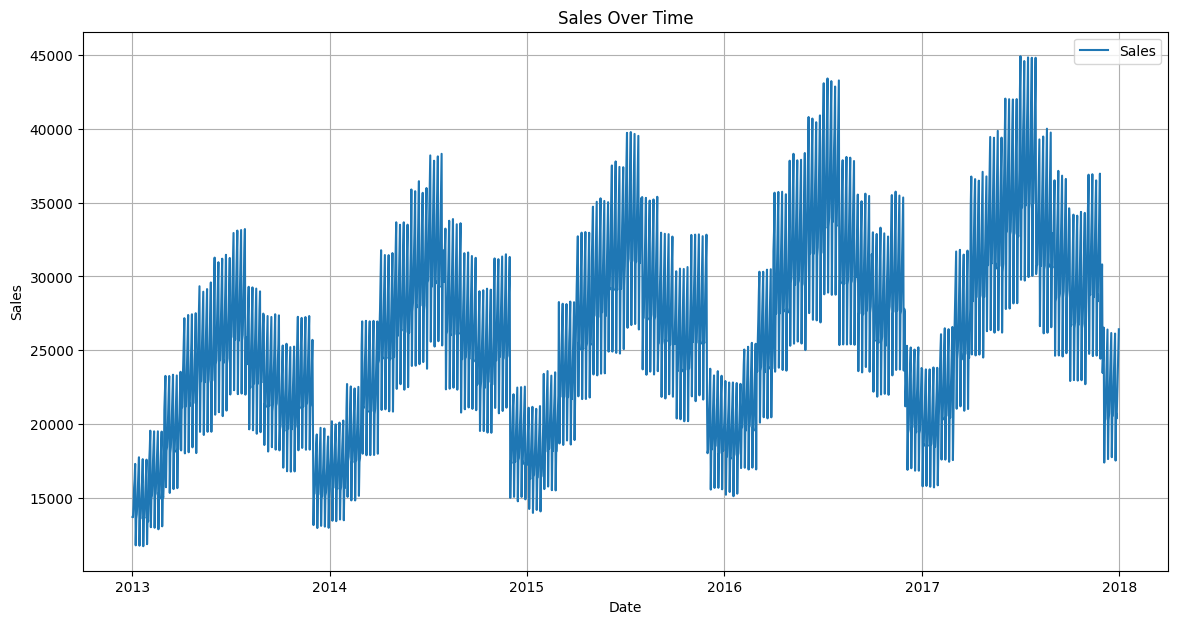

In [22]:
sales_over_time = data.groupby('date')['sales'].sum().reset_index()

# Plot the sales data over time
plt.figure(figsize=(14, 7))
plt.plot(sales_over_time['date'], sales_over_time['sales'], label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()
plt.grid(True)
plt.show()

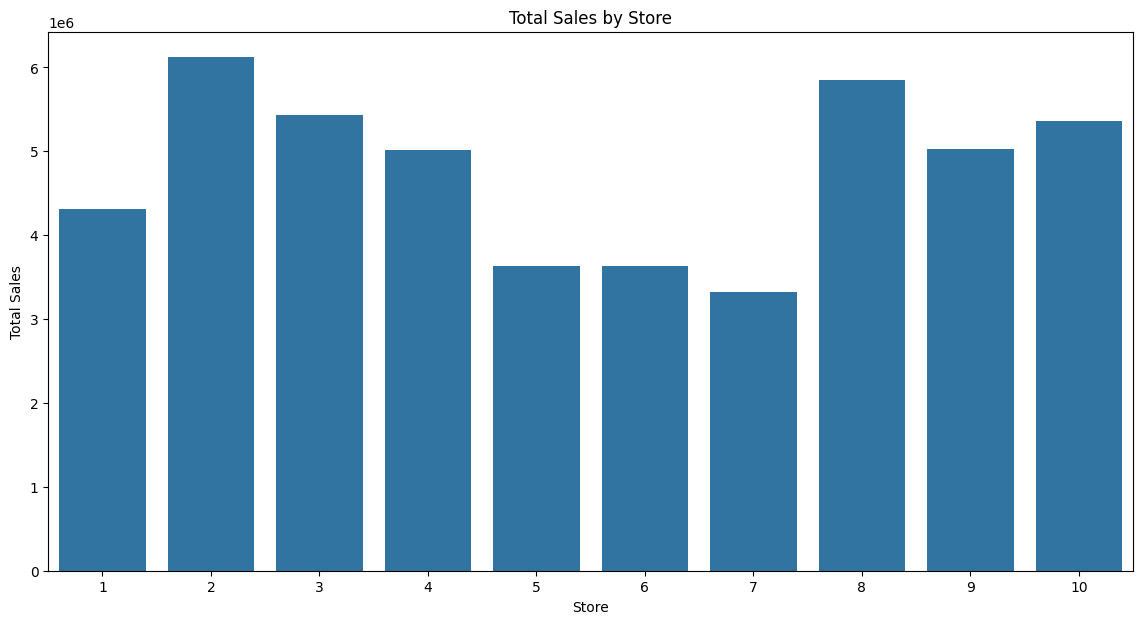

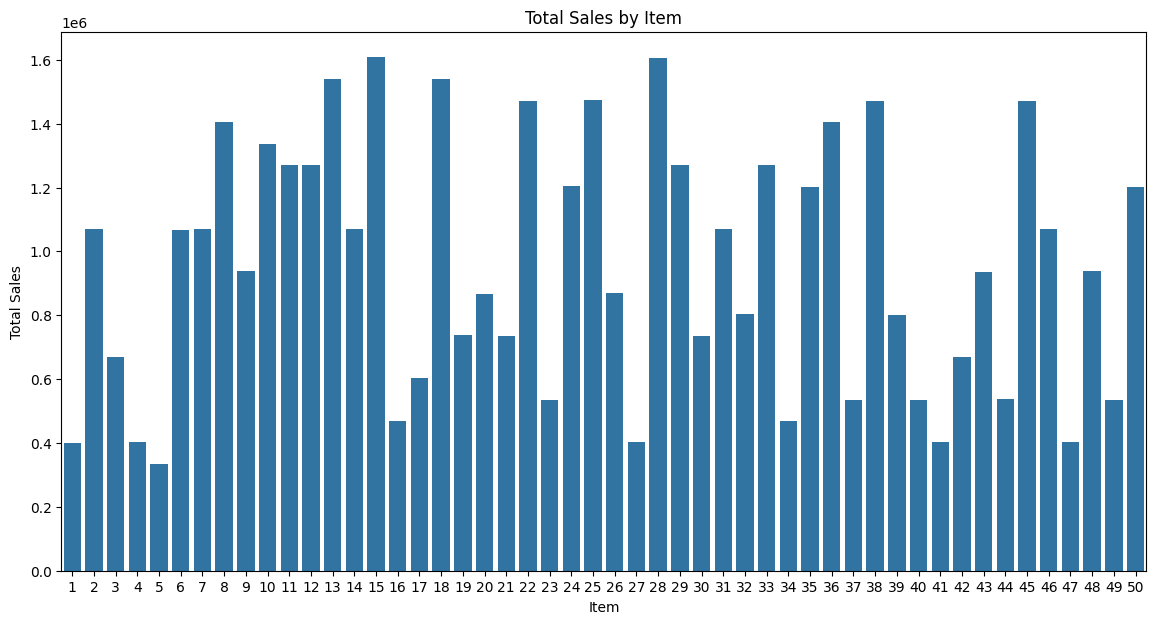

In [23]:
import seaborn as sns 
store_sales = data.groupby('store')['sales'].sum().reset_index()
item_sales = data.groupby('item')['sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='store', y='sales', data=store_sales)
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='item', y='sales', data=item_sales)
plt.xlabel('Item')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item')
plt.show()


In [24]:
correlation_matrix = data.corr()
cor=correlation_matrix['sales'].sort_values(ascending=False)

# Print correlation matrix
print(cor)


sales    1.000000
date     0.195909
year     0.182360
month    0.087414
day      0.002791
store   -0.008170
item    -0.055998
Name: sales, dtype: float64


In [25]:
grouped_data = data.groupby(['date', 'item'])['sales'].sum().reset_index()
best_selling_items = grouped_data.loc[grouped_data.groupby('date')['sales'].idxmax()]
# best_selling_items


In [26]:
most_freq_item= best_selling_items['item'].mode()
most_freq_item

0    15
Name: item, dtype: int64

In [27]:
group_data_least = data.groupby(['date','item'])['sales'].sum().reset_index()
worst_selling_item = group_data_least.loc[group_data_least.groupby('date')['sales'].idxmin()]
worst_selling_item['item'].mode()

0    5
Name: item, dtype: int64

# EDA analysis result
columns-date,item,sales,store
data time span-2013-2017
items- 1-50
sales- qty item sold
store-1-10
best performing store-2
worst performing store-7
highest sale item-15
lowest sale item-5
maximum sale-231(02-07-2017)
minimum sale-0(15-01-2014)
avg.sale-52.25

we need more data about what the items are, the public holidays of every year,does each store has specific focus on a particular item, location of each store, the transportational cost and distance,the cost and selling price of each item, the weather pattern of each year, major events, etc to evaluate the perfomance of each store and tiem. here with the available data we could say the item 5 is not performing much but if the dataset was detailed on what these items are for exampleif the item was of heavy machinery, its normal that its sales compared to other items will lower. so determine and provide a detailed analytical report we need more data. well the trend of sales of each year indicates that the there is a hike in sales during the middle of every year and the sales are lowest during the start of each year and the sales drop by the ned of each year but exeeds that of commencing sales.




MODEL 


In [28]:
data = data.drop(columns=['date'])


In [29]:
x = data.drop(columns='sales')
y=data['sales']

In [30]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.2)

In [31]:
data.head(5)

,store,item,sales,year,month,day
0,1,1,13,2013,1,1
1,1,1,11,2013,1,2
2,1,1,14,2013,1,3
3,1,1,13,2013,1,4
4,1,1,10,2013,1,5


In [32]:
xg_model = xgb.XGBRegressor(objective='reg:squarederror', alpha=1, random_state=42)
xg_model.fit(x_train,y_train)


XGBRegressor(alpha=1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, ...)

In [33]:
y_xgpredict = xg_model.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rate = sqrt(mean_squared_error(y_test,y_xgpredict))
rate

9.955919798189395

In [35]:
mean_sales = data['sales'].mean()
rmse_percentage = (9.9 / mean_sales) * 100
print(f'RMSE as a percentage of Mean Sales: {rmse_percentage:.2f}%')


RMSE as a percentage of Mean Sales: 18.95%


In [36]:
test = pd.read_csv('test.csv')


In [37]:
test['date'] = pd.to_datetime(test['date'])
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day

In [38]:
test1=test.drop(columns=['date','id'])

In [39]:
test1.head(5)

,store,item,year,month,day
0,1,1,2018,1,1
1,1,1,2018,1,2
2,1,1,2018,1,3
3,1,1,2018,1,4
4,1,1,2018,1,5


In [40]:
tet_predict=xg_model.predict(test1)
tet_predict

array([20.597364, 10.990517, 14.2669  , ..., 72.50086 , 74.143105,
       76.29295 ], dtype=float32)

In [41]:
tet_predict1 = np.round(tet_predict).astype(int)
tet_predict1


array([21, 11, 14, ..., 73, 74, 76])

In [42]:
import pickle
pickle.dump(xg_model,open('modelx.pkl','wb'))

In [43]:
csv_file_path = 'store_item_sales.csv'
data.to_csv(csv_file_path, index=False)